# **Projeto final** Curso Profissão: Cientista de Dados - Módulo: Python

In [1]:
# importação das bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.  Exploração de dados

Dicionário das variáveis:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

In [2]:
# extração de dados e exibição das 5 primeiras linhas, com valores nulos representados por na


df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv',
                na_values='na')
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## 1.1. Estrutura dos dados

In [3]:
df.shape

(10127, 16)

In [4]:
# duas segmentações importantes: adimplentes e inadimplentes

ad = df[df['default']==0]
inad = df[df['default']==1]

print(ad.shape)
print(inad.shape)

(8500, 16)
(1627, 16)


In [5]:
# obtendo as quantidades total, de clientes adimplentes e inadimplentes 

clientes_total, _ = df.shape
clientes_ad, _ = ad.shape
clientes_inad, _ = inad.shape

In [6]:
# função para mostrar proporção entre adimplentes e inadimplentes

def relacao_default(ad, inad, total):
    
    print(f'Adimplentes correspondem a {round((ad/total)*100,2)}% do total')
    print(f'Inadimplentes correspondem a {round((inad/total)*100,2)}% do total')
    
relacao_default(clientes_ad, clientes_inad, clientes_total)

Adimplentes correspondem a 83.93% do total
Inadimplentes correspondem a 16.07% do total


## 1.2. Schema

In [7]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [8]:
# colunas e tipos de dados das variáveis

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [9]:
# estatíscas dos atributos categóricos

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Acima podemos ver que duas variáveis supostamente numéricas ('limite_credito' e 'valor_transacoes_12m') estão descritas como categóricas. Iremos corrigir isso na etapa de transformação

In [10]:
# estatíscas dos atributos numéricos

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## 1.3. Dados Faltantes

In [11]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [12]:
# verificando quais colunas contém dados faltantes

df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Vejamos como os dados faltantes se distribuem entre os dois grupos de interesse: adimplentes e inadimplentes. Abaixo, uma função capaz de mostrar essa relação nos dados

In [13]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [14]:
# usando a função sobre todo o dataset

stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [15]:
# proporção de dados faltantes nos adimplentes

stats_dados_faltantes(df=ad)

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [16]:
# proporção de dados faltantes nos inadimplentes

stats_dados_faltantes(df=inad)

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Como podemos observar, a proporção de dados faltantes no dataset e nas segmentações de interesse são semelhantes, portanto podemos excluir as linhas que contém dados faltantes sem muito prejuízo às nossas análises

# 2. Transformação e limpeza de dados

## 2.1. Correção do Schema

Vamos revisitar as colunas com tipo de dados incorreto, conforme avaliado anteriormente

In [17]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [18]:
# colunas de interesse para correção: limite_credito e valor_transacoes_12m
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


O separador decimal e de centenas dos dados estão configurados para o padrão brasileiro, que o Python não reconhece. Precisamos remover os pontos (".") e substituir as vírgulas (",") por pontos ("."). Para tal, vamos usar uma função lambda

In [20]:
num_std = lambda valor: float(valor.replace(".", "").replace(",", "."))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(num_std)
df['limite_credito'] = df['limite_credito'].apply(num_std)

Vamos verificar se funcionou

In [21]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Como podemos ver acima, a função transformou os dados corretamente. Vamos conferir todo o dataset, para ver se ainda há algo a fazer em *data wrangling*

In [22]:
# atributos categóricos

df.drop('id', axis=1).select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [23]:
# atributos numéricos
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Parece estar tudo certo com os tipos de dados. Podemos prosseguir.

## 2.2. Remoção das linhas com dados faltantes

In [24]:
# excluíndo as linhas com dados faltantes ('na')
df.dropna(inplace=True)

In [25]:
# verificando novamente o dataset
df.shape

(7081, 16)

O número de colunas se preservou e o de linhas diminuiu, como esperado. Vamos agora verificar as segmentações

In [26]:
# adimplentes
df_ad = df[df['default']==0] # redefinição das segmentações, pois o dropna foi feito sobre o dataframe principal,
                             # sendo necessário redefinir para transmitir seus efeitos
df_ad.shape

(5968, 16)

In [27]:
# inaadimplentes
df_inad = df[df['default'] == 1] # idem ao anterior

df_inad.shape

(1113, 16)

Vamos verificar se as proporções observadas entre o dataset e as segmentações se mantém próximas do que eram antes. Para tal, vamos aproveitar a função "relacao_default" criada anteriormente

In [28]:
qtd_total_novo, _ = df.shape
qtd_ad_novo, _ = df_ad.shape
qtd_inad_novo, _ = df_inad.shape

In [29]:
def relacao_default_nova(ad, inad, total):
    print("As proporções antes da limpeza eram:\n")
    relacao_default(clientes_ad, clientes_inad, clientes_total)
    print("\n")
    print("Após a limpeza as proporções se tornaram:\n")
    relacao_default(ad, inad, total)

In [30]:
relacao_default_nova(qtd_ad_novo, qtd_inad_novo, qtd_total_novo)

As proporções antes da limpeza eram:

Adimplentes correspondem a 83.93% do total
Inadimplentes correspondem a 16.07% do total


Após a limpeza as proporções se tornaram:

Adimplentes correspondem a 84.28% do total
Inadimplentes correspondem a 15.72% do total


Podemos perceber que as proporções se mantiveram muito próximas dos valores originais, portanto não teremos grandes perdas nas análises. Podemos prosseguir.

# 3. Visualização de Dados

In [31]:
# Definindo um estilo padrão para os gráficos

sns.set_style("whitegrid")

In [32]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


## 3.1. Visualizações categóricas

Vamos avaliar, através de gráficos, a relação entre a variável de interesse *default* com as variáveis categóricas.

A função abaixo exibe três gráficos de barras em um subplot, permitindo comparar visualmente o comportamento dessas variáveis ao longo do dataset

In [33]:
def bar_plot_rotulado(col):
    coluna = col
    titulos = [f'{col.capitalize()} dos Clientes', f'{col.capitalize()} dos Clientes Adimplentes', f'{col.capitalize()} dos Clientes Inadimplentes']

    # Criando a estrutura do subplot
    figura, eixos = plt.subplots(1, 3, figsize=(20, 3), sharex=True)
    max_y = 0

    # Laço for para iterar sobre o dataframe principal e suas segmentações
    for eixo, dataframe in enumerate([df, df_ad, df_inad]): # Método enumerate retorna uma tupla com o índice do dataframe e seu conteúdo

        # Criando um datraframe local
        df_to_plot = dataframe[coluna].value_counts().reset_index()
        df_to_plot.columns = [coluna, 'frequencia_absoluta']
        df_to_plot.sort_values(by=[coluna], inplace=True)

        # Gerando os gráficos de barras
        f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel="", ylabel='Frequência Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

        # Conferindo se a escala é positiva, por se tratar de contagem
        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y

        # Criando uma lista de posições x numéricas
        x_positions = range(len(df_to_plot))

        # Adicionando rótulos de dados sobre as barras
        for x, y in zip(x_positions, df_to_plot['frequencia_absoluta']):
            f.annotate(str(y), (x, y), ha='center', va='bottom')

    # Definição da escala do gráfico
    for eixo in eixos:
        eixo.set(ylim=(0, max_y))

    # Mostrando o gráfico gerado
    plt.show()




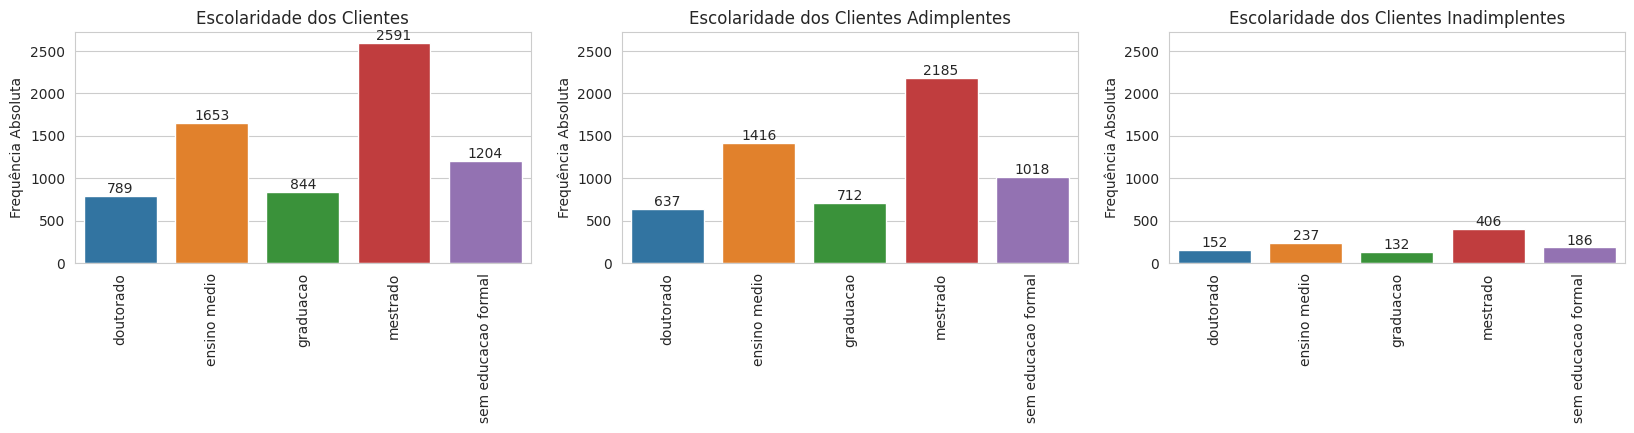

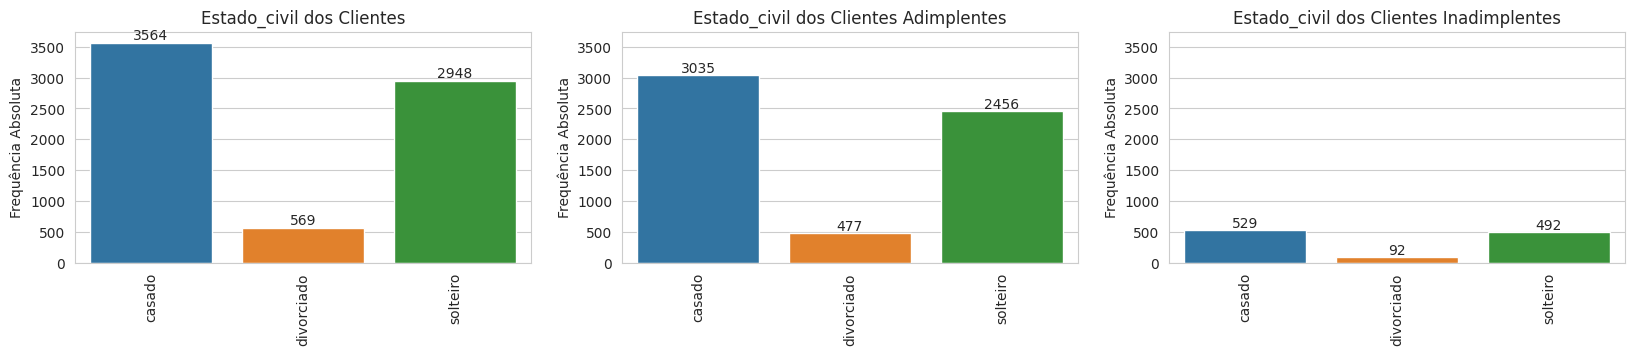

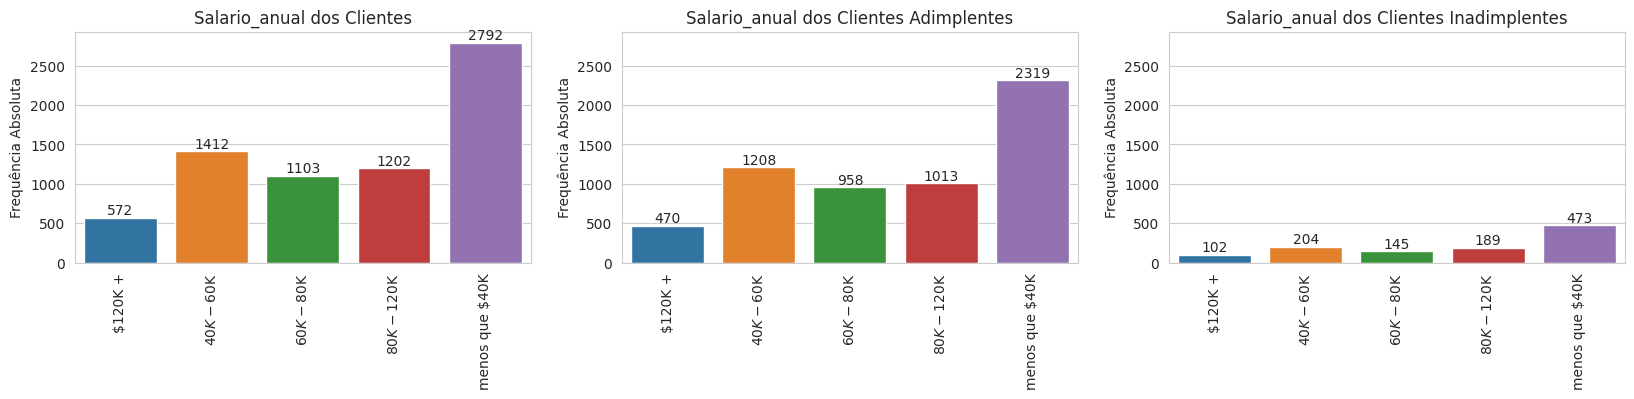

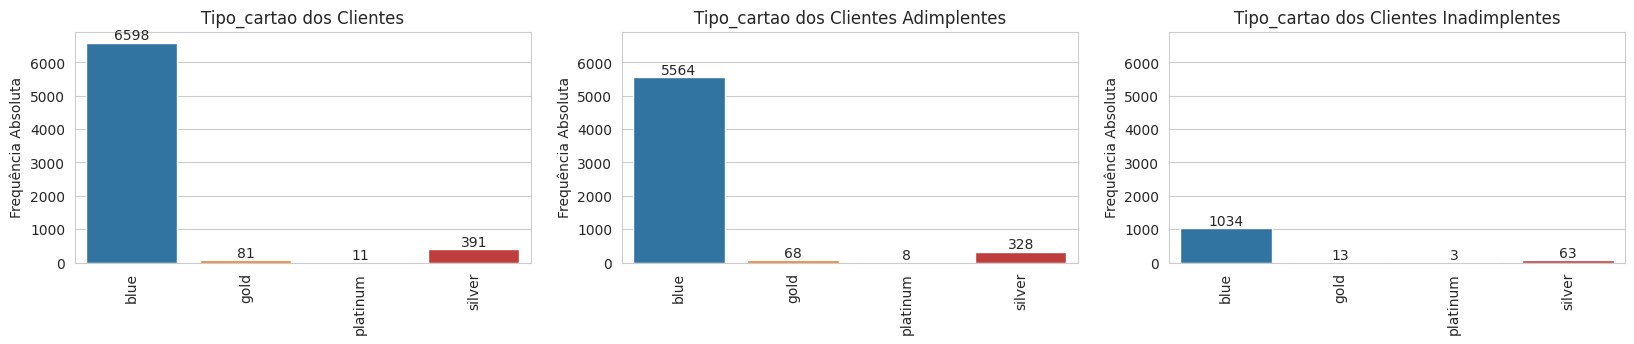

In [34]:
colunas_object = list(df.select_dtypes('object').columns) #selecionando apenas atributos categóricos
del(colunas_object[0]) #removendo sexo


for c in colunas_object: #plotando todos em sequência
    bar_plot_rotulado(c)


Parece que as proporções entre os grupos de interesse não sofrem muita influência das variáveis categóricas. Vejamos o que os números nos dizem.

## 3.2. Visualizações numéricas

In [35]:
df_ad.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,5968.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
idade,5968.0,46.317359,8.092984,26.00,41.0000,46.000,52.0000,73.00
dependentes,5968.0,2.331434,1.293032,0.00,1.0000,2.000,3.0000,5.00
meses_de_relacionamento,5968.0,35.949397,8.020490,13.00,31.0000,36.000,40.0000,56.00
qtd_produtos,5968.0,3.916555,1.515820,1.00,3.0000,4.000,5.0000,6.00
iteracoes_12m,5968.0,2.361930,1.085288,0.00,2.0000,2.000,3.0000,5.00
meses_inativo_12m,5968.0,2.276977,1.001688,0.00,2.0000,2.000,3.0000,6.00
limite_credito,5968.0,8555.587349,9116.518156,1438.01,2560.0975,4349.465,10853.6175,34516.99
valor_transacoes_12m,5968.0,4635.007929,3587.381325,816.08,2246.8975,4048.600,4775.8550,17995.49
qtd_transacoes_12m,5968.0,68.176441,23.318695,11.00,52.0000,70.000,82.0000,134.00


Usando a função abaixo, vou plotar histogramas para todas as variáveis numéricas, procurando algum padrão ou recorência de maneira visual.

In [36]:
def hist_plot(col):
    
    # Dados para os histogramas
    data1 = df[col]  # Dataframe geral
    data2 = df_ad[col] # Adimplentes
    data3 = df_inad[col] # Inadimplentes

    # Criando os subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 3))  # 1 linha, 2 colunas

    # Plotando o histograma para o Dataframe geral
    axs[0].hist(data1, bins=15, color='blue', alpha=0.5)
    axs[0].set_title(f'{col.capitalize()} geral')

    # Plotando o histograma para os Adimplentes
    axs[1].hist(data2, bins=15, color='green', alpha=0.5)
    axs[1].set_title(f'{col.capitalize()} dos clientes adimplentes')

    # Plotando o histograma para os Inadimplentes
    axs[2].hist(data3, bins=15, color='red', alpha=0.5)
    axs[2].set_title(f'{col.capitalize()} dos clientes inadimplentes')

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()

# Mostrando o gráfico
plt.show()


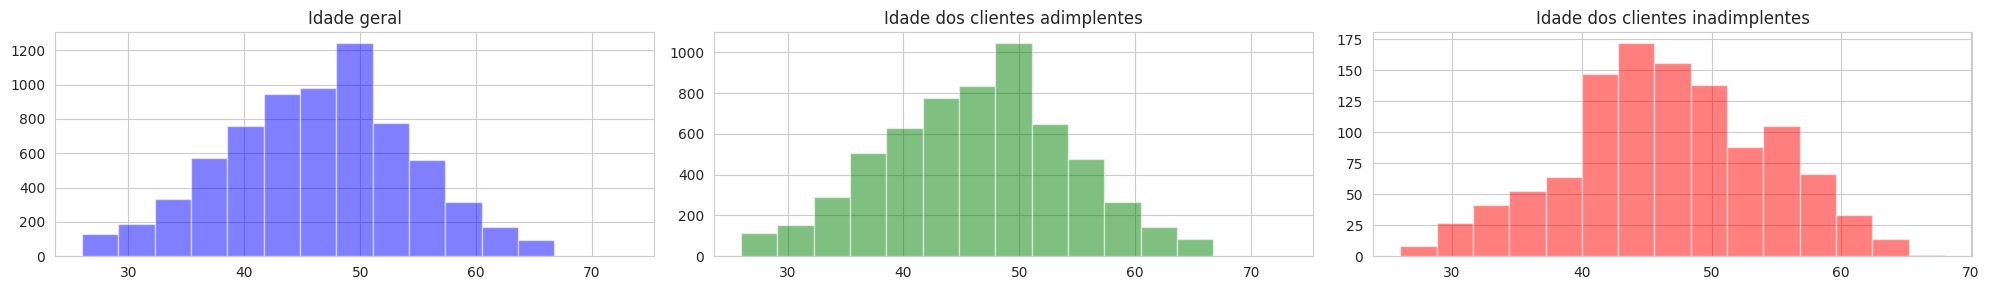

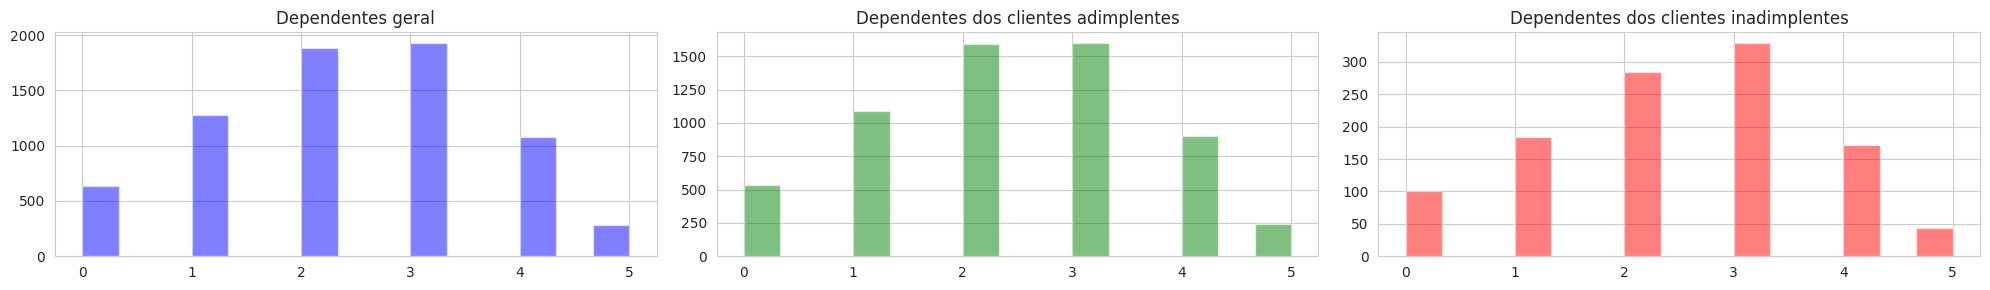

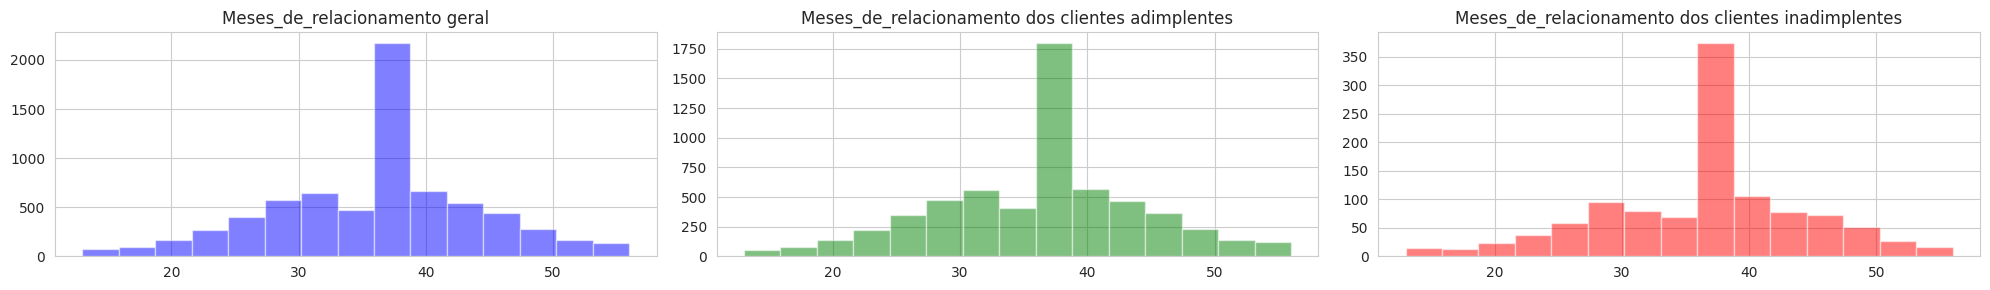

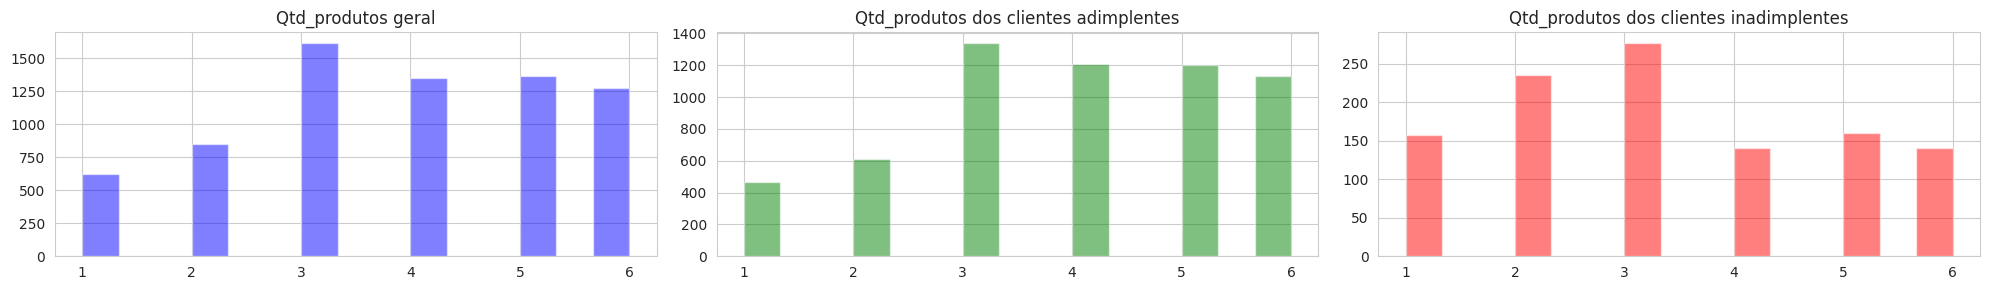

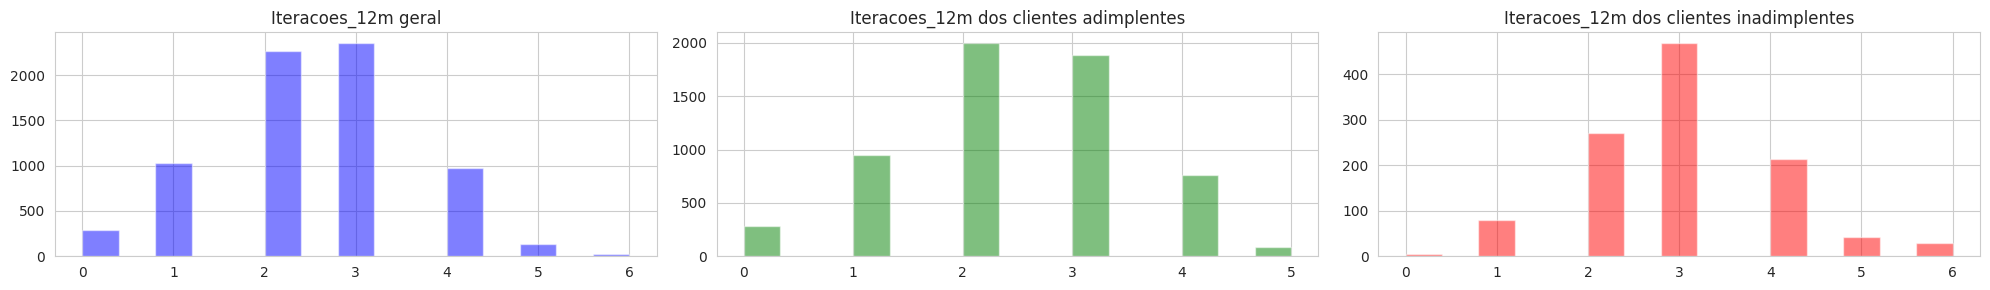

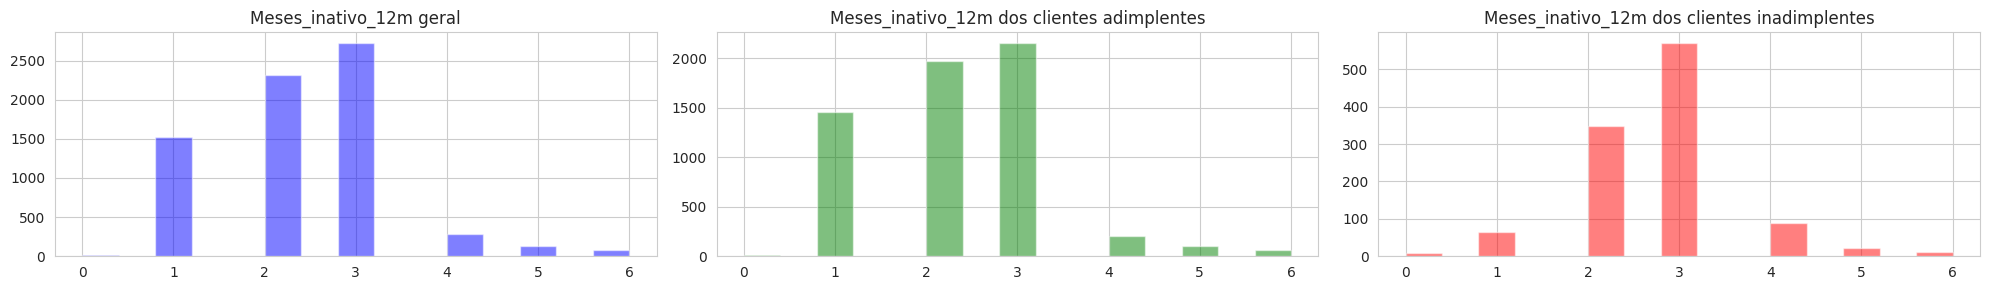

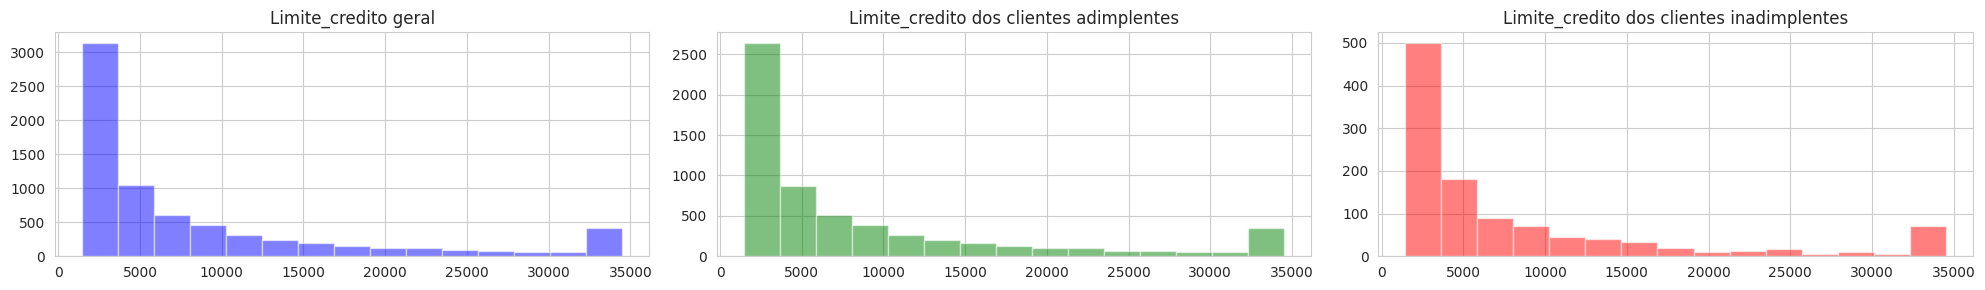

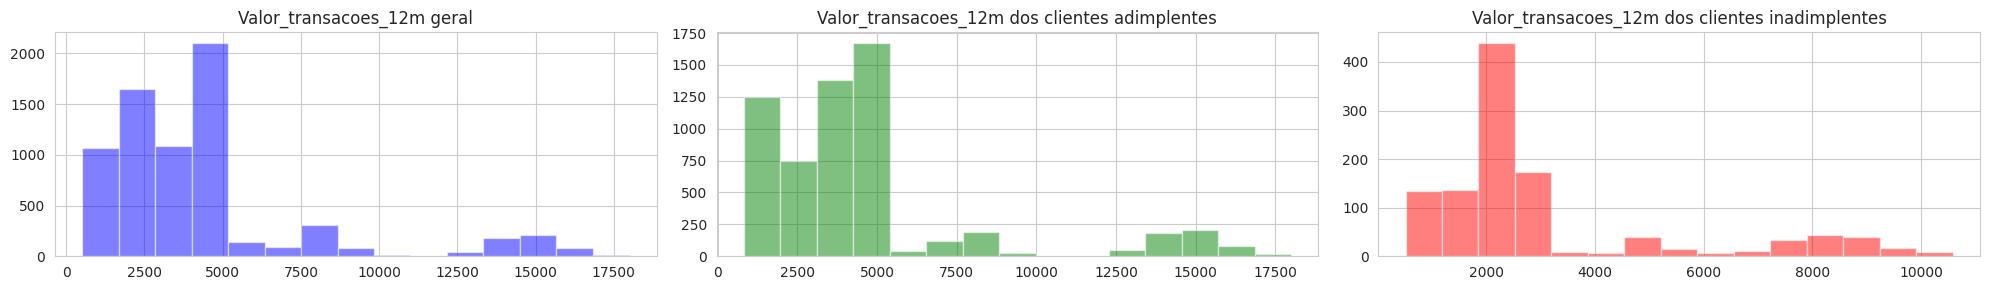

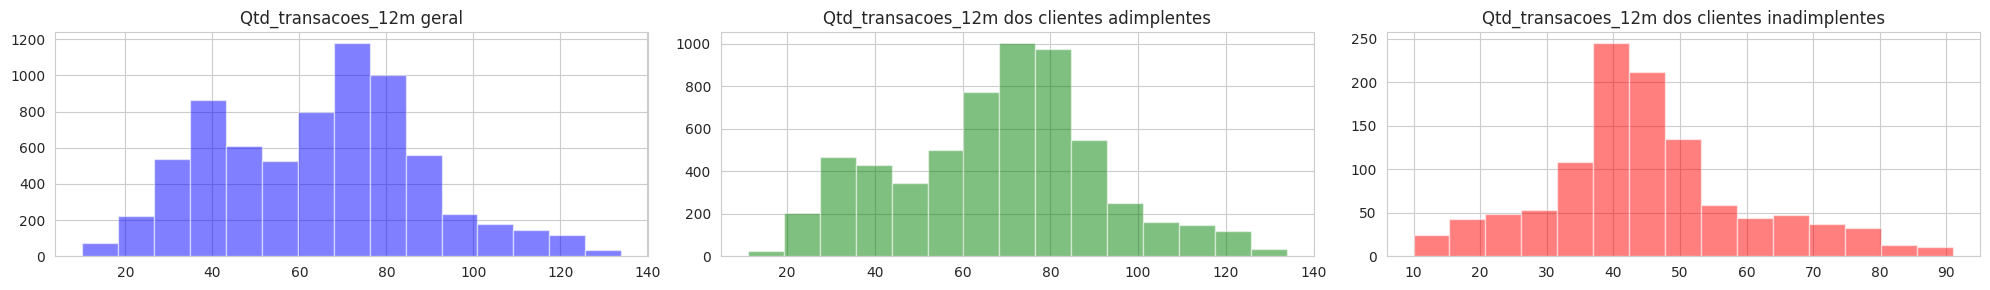

In [37]:
colunas_number = df.drop(['id','default'], axis=1).select_dtypes('number').columns

for c in colunas_number:
    hist_plot(c)

Percebi grande variação na escala dos gráficos de 'valor_transacoes_12m', 'qtd_transacoes_12m'. Vou usar um joint plot para explorar essas relações

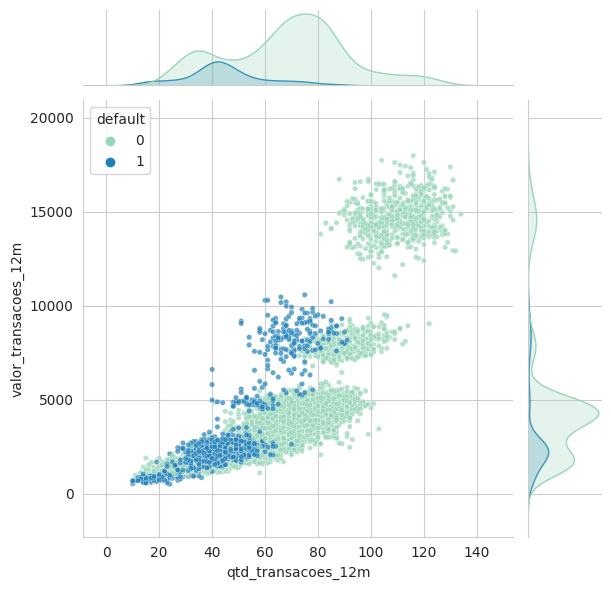

In [38]:
sns.jointplot(data=df, x="qtd_transacoes_12m", y='valor_transacoes_12m', s=15, hue='default', palette='YlGnBu', alpha=0.7)

O gráfico acima mostra que os clientes inadimplentes estão restritos à faixa com menos de 100 transações e menos de 12k gastos em 12 meses, aproximadamente. 

# 4. Conclusão

Os gráficos gerados sugerem que as variáveis com maior influência sobre a situação dos clientes (*default*) são a quantidade e valor das transações efetuadas nos últimos 12 meses. Esta informação pode ser útil na criação de modelos de machine learning com capacidade para prever, com considerável acertividade, quais são os clientes mais e menos propensos a arcar com os compromissos de crédito assumidos. Além disso, clientes mais vulneráveis ou expostos aos fatores que parecem predizer inadimplência podem ter seus limites de crédito reajustados, ou mesmo receberem algum tipo de acessoria extra, melhorando considerávelmente a experiência do usuário e, por consequência, os resultados da operadora de crédito.